<a href="https://colab.research.google.com/github/sugban/Python-Learning-/blob/main/Lesson%2033/Data_Analysis_Project_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- Cleaning and Data validation

In [ ]:
# importing required libraries

import pandas as pd
import numpy as np
import datetime
import missingno as mn

In [ ]:
# giving file path in a variable path
path = 'Customer dataset.xlsx'

# to check sheets name inside excel workbook
print(pd.ExcelFile(path).sheet_names)

['Transactions', 'CustomerDemographic', 'CustomerAddress']


### Loading excel sheet

In [ ]:
# loading excel file sheet, we'll use sheet_name parameter, while loading excel file
df=pd.read_excel(path, sheet_name='CustomerDemographic')

In [ ]:
# showing first two rows
df.head(2)

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11


In [ ]:
# to avoid reading first line from excel sheet, we'll use header as a parameter
df=pd.read_excel(path, sheet_name='CustomerDemographic', header=1)
df.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0


In [ ]:
# showing rows and column of the dataframe
df.shape

(4000, 13)

In [ ]:
# to get the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

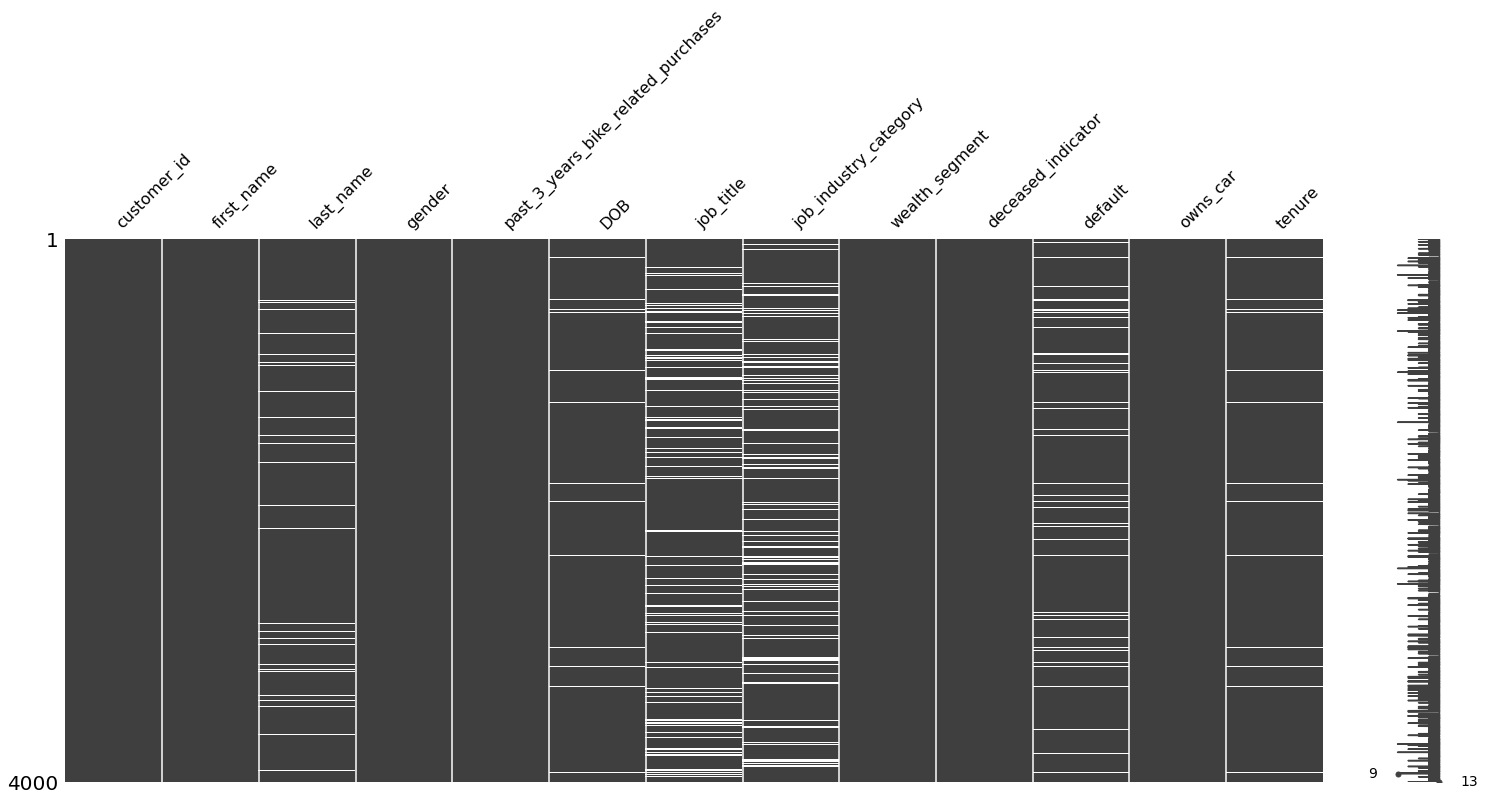

In [ ]:
# to check missing value in dataframe in matrix format
mn.matrix(df)

In [ ]:
# another way to check the missing value
df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

### Handling missing value

In [ ]:
# creating a new dataframe to make changes and to keep raw data unchanged
df_cust = df.copy()

In [ ]:
df_cust.last_name.fillna(' ',inplace=True)
df_cust.last_name

0       Medendorp
1         Bockman
2          Dearle
3                
4          Calton
          ...    
3995     Halgarth
3996       Nisuis
3997      Woolley
3998             
3999      Oldland
Name: last_name, Length: 4000, dtype: object

In [ ]:
df_cust['full_name'] = df_cust['first_name'].astype('str')+' '+df_cust['last_name'].astype('str')
df_cust.full_name

0           Laraine Medendorp
1                 Eli Bockman
2                Arlin Dearle
3                    Talbot  
4       Sheila-kathryn Calton
                ...          
3995         Rosalia Halgarth
3996            Blanch Nisuis
3997           Sarene Woolley
3998              Patrizius  
3999            Kippy Oldland
Name: full_name, Length: 4000, dtype: object

In [ ]:
# now we'll drop these two columns
df_cust.drop(['first_name','last_name'],axis=1,inplace=True)
df_cust.columns

Index(['customer_id', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'default', 'owns_car', 'tenure', 'full_name'],
      dtype='object')

In [ ]:
# we'll chack again missing data
df_cust.isnull().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
full_name                                0
dtype: int64

In [ ]:
# missing values can be filled by fillna method

df_cust['job_industry_category'].fillna('others',inplace=True)
df_cust['job_title'].fillna('others',inplace=True)

In [ ]:
df_cust.isnull().sum()

customer_id                              0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
full_name                                0
dtype: int64

In [ ]:
# now we'll check default column
df_cust.default    # this also comes in data validation

0                                                      "'
1                            <script>alert('hi')</script>
2                                     2018-02-01 00:00:00
3       () { _; } >_[$($())] { touch /tmp/blns.shellsh...
4                                                     NIL
                              ...                        
3995                                                 -100
3996                                             â¦testâ§
3997                                                  NaN
3998                               Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ 
3999                                                  0/0
Name: default, Length: 4000, dtype: object

In [ ]:
df_cust.drop('default',axis=1,inplace=True)
df_cust.isnull().sum()

customer_id                             0
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    87
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                 87
full_name                               0
dtype: int64

In [ ]:
# to remove all the rows, which has null value
df_cust.dropna(inplace=True)  
df_cust.isnull().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
full_name                              0
dtype: int64

In [ ]:
# showing total rows and column of the dataframe
df_cust.shape

(3913, 11)

In [ ]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int64         
 1   gender                               3913 non-null   object        
 2   past_3_years_bike_related_purchases  3913 non-null   int64         
 3   DOB                                  3913 non-null   datetime64[ns]
 4   job_title                            3913 non-null   object        
 5   job_industry_category                3913 non-null   object        
 6   wealth_segment                       3913 non-null   object        
 7   deceased_indicator                   3913 non-null   object        
 8   owns_car                             3913 non-null   object        
 9   tenure                               3913 non-null   float64       
 10  full_name   

In [ ]:
df_cust.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name
0,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine Medendorp
1,2,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,Eli Bockman
2,3,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,Arlin Dearle
3,4,Male,33,1961-10-03,others,IT,Mass Customer,N,No,7.0,Talbot
4,5,Female,56,1977-05-13,Senior Editor,others,Affluent Customer,N,Yes,8.0,Sheila-kathryn Calton


### Data validation

In [ ]:
df_cust.gender.value_counts()

Female    2037
Male      1872
F            1
U            1
Femal        1
M            1
Name: gender, dtype: int64

In [ ]:
def gen(val):
    if val == 'Female' or val =='Femal':
        val='F'
    elif val == 'Male':
        val='M'
    return val

In [ ]:
df_cust['gender']=df_cust.gender.apply(gen)
df_cust.gender.value_counts()

F    2039
M    1873
U       1
Name: gender, dtype: int64

In [ ]:
df_cust.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name
0,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine Medendorp
1,2,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,Eli Bockman
2,3,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,Arlin Dearle
3,4,M,33,1961-10-03,others,IT,Mass Customer,N,No,7.0,Talbot
4,5,F,56,1977-05-13,Senior Editor,others,Affluent Customer,N,Yes,8.0,Sheila-kathryn Calton


In [ ]:
# to find the number of unique values in each column
df_cust.nunique()

customer_id                            3913
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               196
job_industry_category                    10
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
full_name                              3912
dtype: int64

In [ ]:
# to check duplicate value
df_cust.duplicated().sum()

0

In [ ]:
# to seperate dataframe in categorical data and numerical data
df_cust.select_dtypes(include=['object']).columns

Index(['gender', 'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'full_name'],
      dtype='object')

In [ ]:
df_cust.select_dtypes(include=['int64','float64']).columns  # or you can use exclude

Index(['customer_id', 'past_3_years_bike_related_purchases', 'tenure'], dtype='object')

In [ ]:
# showing statistical summary of the dataframe
df_cust.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,3913.000000,3913.000000,3913.000000
mean,1999.325837,49.041912,10.657041
std,1155.183301,28.764990,5.660146
min,1.000000,0.000000,1.000000
25%,1002.000000,24.000000,6.000000
50%,1999.000000,48.000000,11.000000
75%,2997.000000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [ ]:
df_cust.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name
count,3913.000000,3913,3913.000000,3913,3913,3913,3913,3913,3913,3913.000000,3913
unique,NaN,3,NaN,3448,196,10,3,2,2,NaN,3912
top,NaN,F,NaN,1978-01-30 00:00:00,others,Manufacturing,Mass Customer,N,Yes,NaN,Corabelle
freq,NaN,2039,NaN,7,497,796,1954,3911,1974,NaN,2
first,NaN,NaN,NaN,1843-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2002-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1999.325837,NaN,49.041912,NaN,NaN,NaN,NaN,NaN,NaN,10.657041,NaN
std,1155.183301,NaN,28.764990,NaN,NaN,NaN,NaN,NaN,NaN,5.660146,NaN
min,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,1002.000000,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN


In [ ]:
df_cust.to_csv('customer.csv')

In [ ]:
df=pd.read_csv('customer.csv')
df.head()

,Unnamed: 0,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name
0,0,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine Medendorp
1,1,2,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,Eli Bockman
2,2,3,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,Arlin Dearle
3,3,4,M,33,1961-10-03,others,IT,Mass Customer,N,No,7.0,Talbot
4,4,5,F,56,1977-05-13,Senior Editor,others,Affluent Customer,N,Yes,8.0,Sheila-kathryn Calton


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name
0,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine Medendorp
1,2,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,Eli Bockman
2,3,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,Arlin Dearle
3,4,M,33,1961-10-03,others,IT,Mass Customer,N,No,7.0,Talbot
4,5,F,56,1977-05-13,Senior Editor,others,Affluent Customer,N,Yes,8.0,Sheila-kathryn Calton


### Manipulation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913 entries, 0 to 3912
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3913 non-null   int64  
 1   gender                               3913 non-null   object 
 2   past_3_years_bike_related_purchases  3913 non-null   int64  
 3   DOB                                  3913 non-null   object 
 4   job_title                            3913 non-null   object 
 5   job_industry_category                3913 non-null   object 
 6   wealth_segment                       3913 non-null   object 
 7   deceased_indicator                   3913 non-null   object 
 8   owns_car                             3913 non-null   object 
 9   tenure                               3913 non-null   float64
 10  full_name                            3913 non-null   object 
dtypes: float64(1), int64(2), objec

In [ ]:
df['DOB']=pd.to_datetime(df['DOB'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3913 entries, 0 to 3912
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int64         
 1   gender                               3913 non-null   object        
 2   past_3_years_bike_related_purchases  3913 non-null   int64         
 3   DOB                                  3913 non-null   datetime64[ns]
 4   job_title                            3913 non-null   object        
 5   job_industry_category                3913 non-null   object        
 6   wealth_segment                       3913 non-null   object        
 7   deceased_indicator                   3913 non-null   object        
 8   owns_car                             3913 non-null   object        
 9   tenure                               3913 non-null   float64       
 10  full_name   

In [ ]:
df['age']=df['DOB'].apply(lambda x : (pd.datetime.now().year - x.year))
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name,age
0,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine Medendorp,69
1,2,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,Eli Bockman,42
2,3,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,Arlin Dearle,68
3,4,M,33,1961-10-03,others,IT,Mass Customer,N,No,7.0,Talbot,61
4,5,F,56,1977-05-13,Senior Editor,others,Affluent Customer,N,Yes,8.0,Sheila-kathryn Calton,45


In [ ]:
df.age.value_counts()

44     217
45     204
48     152
46     152
42     123
49     122
43     118
36     114
47     114
63      94
37      91
27      90
51      88
58      85
24      80
41      79
28      79
53      78
60      76
25      74
33      74
30      74
55      73
34      72
35      72
65      71
54      69
57      69
26      67
56      65
66      63
68      61
61      60
23      60
29      60
59      59
67      58
62      58
52      57
64      55
50      54
32      53
31      48
38      43
22      42
40      41
39      40
21      34
69      19
20       6
179      1
78       1
91       1
87       1
79       1
82       1
Name: age, dtype: int64

In [ ]:
df.drop(df[df['age']>100].index,inplace=True)
df.drop('DOB',axis=1,inplace=True)

In [ ]:
df['age_range'] = pd.cut(df['age'], bins=10)

### Merging two files into one dataframe

In [ ]:
df1 = pd.read_csv('Customer_Transaction.csv')
df1.head()

,Unnamed: 0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit Margin
0,0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01,17.87
1,1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01,1702.55
2,2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01,1544.61
3,3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01,817.36
4,4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01,1055.82


In [ ]:
df1.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
merged_cust_trans = df.merge(df1, on='customer_id')
merged_cust_trans.head()

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,full_name,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit Margin
0,1,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine Medendorp,...,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01,110.56
1,1,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine Medendorp,...,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,1970-01-01,751.02
2,1,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine Medendorp,...,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,1970-01-01,189.28
3,1,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine Medendorp,...,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,1970-01-01,90.10
4,1,F,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine Medendorp,...,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01,17.87


In [ ]:
df.shape

(3912, 12)

In [ ]:
df1.shape

(19803, 14)

In [ ]:
merged_cust_trans.shape

(19354, 25)

In [ ]:
merged_cust_trans.isnull().sum()

customer_id                            0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
full_name                              0
age                                    0
age_range                              0
transaction_id                         0
product_id                             0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
Profit Margin   

In [ ]:
merged_cust_trans.duplicated().sum()

0

In [ ]:
merged_cust_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19354 entries, 0 to 19353
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   customer_id                          19354 non-null  int64   
 1   gender                               19354 non-null  object  
 2   past_3_years_bike_related_purchases  19354 non-null  int64   
 3   job_title                            19354 non-null  object  
 4   job_industry_category                19354 non-null  object  
 5   wealth_segment                       19354 non-null  object  
 6   deceased_indicator                   19354 non-null  object  
 7   owns_car                             19354 non-null  object  
 8   tenure                               19354 non-null  float64 
 9   full_name                            19354 non-null  object  
 10  age                                  19354 non-null  int64   
 11  age_range      

In [ ]:
merged_cust_trans['transaction_date']=pd.to_datetime(merged_cust_trans['transaction_date'])

In [ ]:
merged_cust_trans['month']=merged_cust_trans['transaction_date'].apply(lambda x : x.month)

### Visualization

In [ ]:
gender = merged_cust_trans.groupby('gender')['gender'].count().reset_index(name='count')
gender

,gender,count
0,F,9921
1,M,9433


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

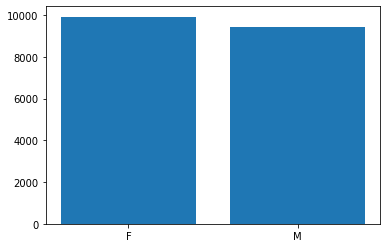

In [ ]:
plt.bar(gender['gender'],gender['count'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


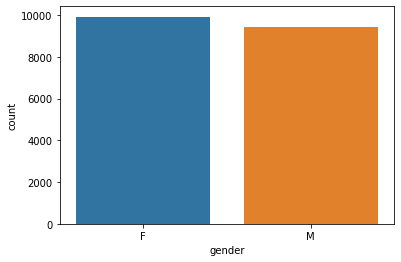

In [ ]:
sns.barplot(gender['gender'],gender['count'])

In [ ]:
fig=px.bar(gender, x='gender',y='count')
fig.show()

In [ ]:
age = merged_cust_trans.groupby(['age_range','gender'])['gender'].count().reset_index(name='count') 
age

,age_range,gender,count
0,"(19.929, 27.1]",F,1135
1,"(19.929, 27.1]",M,1213
2,"(27.1, 34.2]",F,1156
3,"(27.1, 34.2]",M,1040
4,"(34.2, 41.3]",F,1158
5,"(34.2, 41.3]",M,1165
6,"(41.3, 48.4]",F,2794
7,"(41.3, 48.4]",M,2661
8,"(48.4, 55.5]",F,1494
9,"(48.4, 55.5]",M,1168


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



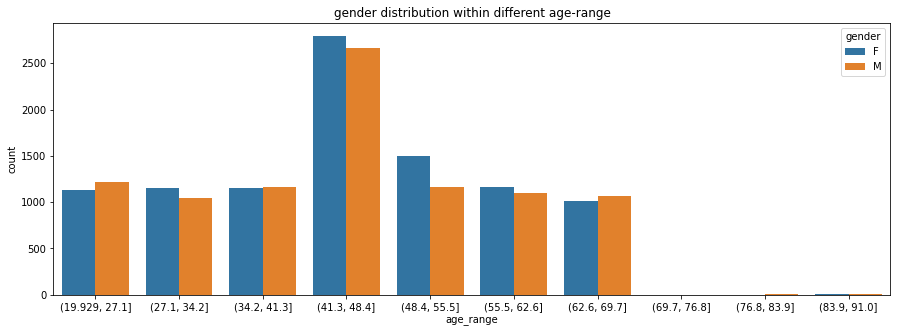

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(age['age_range'],age['count'],hue=age['gender'])
plt.title('gender distribution within different age-range')
plt.show()

In [ ]:
fig = px.bar(age, x='gender', y='count', color='age_range', title='gender distribution within different age-range')
fig.show()

In [ ]:
# to save seaborn or matplotlib plot
plt.savefig('gender distribution within different age-range.jpg')

<Figure size 432x288 with 0 Axes>

In [ ]:
import plotly

# to save plotly plots
plotly.offline.plot(fig, filename='gender distribution within different age-range.html')

'gender distribution within different age-range.html'

In [ ]:
timeline = merged_cust_trans.groupby('month')['Profit Margin'].sum().reset_index(name='Profit')

In [ ]:
px.line(timeline, x='month',y='Profit',title='Profit through year 2017')

In [ ]:
order = merged_cust_trans.groupby('month')['online_order'].value_counts().reset_index(name='no_of_purchase')

In [ ]:
px.line(order, x='month',y='no_of_purchase',color='online_order',title='Online or Offline purchase through year 2017')